In [90]:
import spacy
import xgi
import matplotlib.pyplot as plt
nlp = spacy.load("en_core_web_trf")
nlp.add_pipe("segram", config={
    "vectors": "en_core_web_lg"
})
nlp.add_pipe("segram_coref")

In [91]:
doc = nlp(
    "Recent breakthroughs in artificial inteligence "
    "may reshape the society in some good and some bad ways."
)._.segram
sent = doc.sents[0]
sent.graph

may reshape
    breakthroughs [subj]
        Recent [desc]
        in [prep]
            inteligence [pobj]
                artificial [desc]
    the society [dobj]
    in [prep]
        ways [pobj]
            good [desc]
            bad [desc|conj]

In [149]:
pedges = { 
    p.idx: p.components.get("head").tuple 
    for p in sent.proots.get("subdag").flat
    if len(p.tokens) > 2 
}
sedges = { (s.idx, t.idx): (s.head.tok, t.head.tok) for s, t in sent.graph.links }
hedges = { **pedges, **sedges }
H = xgi.Hypergraph(hedges)
H.edges.members()

[{Recent, breakthroughs, in, artificial, inteligence},
 {in, artificial, inteligence},
 {in, good, bad, ways},
 {good, bad, ways},
 {Recent, breakthroughs},
 {breakthroughs, in},
 {in, inteligence},
 {artificial, inteligence},
 {breakthroughs, reshape},
 {reshape, society},
 {reshape, in},
 {in, ways},
 {good, ways},
 {bad, ways}]

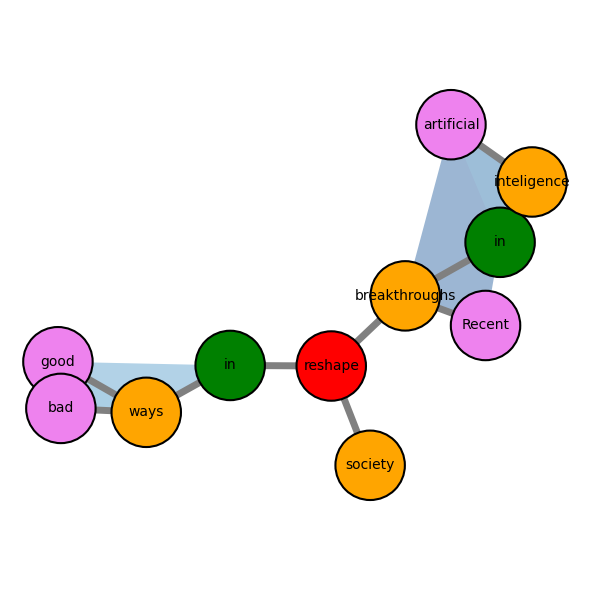

In [151]:
node_cmap = {
    "Verb": "red",
    "Noun": "orange",
    "Desc": "violet",
    "Prep": "green"
}
kwds = dict(
    dyad_color="gray",
    dyad_lw=5,
    node_fc={ n.i: node_cmap[sent.cmap[n.i].alias] for n in H.nodes },
    node_ec="black",
    node_lw=1.5,
    node_size=50
)
fig, ax = plt.subplots(figsize=(6, 6))
pos = xgi.barycenter_kamada_kawai_layout(H)
xgi.draw(H, pos, node_labels=True, **kwds)
fig.tight_layout()